## Ejercicio 5: Aplicación del método $\epsilon$-constraint

$$
\begin{align}
	&\text{min }  && f_1(x)=-x_1+3.5x_2\\
	&\text{min }  && f_2(x)=2x_1-x_2\\
	&\text{s.t. }  && x_1   \le  20\\
	&  && x_2 \le  100\\
    &  && 5x_1+4x_2 \le 200\\
    & && x_1, x_2 \geq  0  \\
\end{align}
$$

#### Importamos los paquetes necesarios y creamos el modelo y variables

In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt

model = ConcreteModel()

model.X1 = Var(within=NonNegativeReals)
model.X2 = Var(within=NonNegativeReals)

#### Definimos funciones objetivo y restricciones

In [2]:

model.O_f1 = Objective(expr= -model.X1 +3.5*model.X2 , sense=minimize)
model.O_f2 = Objective(expr=  2*model.X1 -  model.X2 , sense=minimize)

model.C1 = Constraint(expr = model.X1 <= 20)
model.C2 = Constraint(expr = model.X2 <= 100)
model.C3 = Constraint(expr = 5 * model.X1 + 4 * model.X2 <= 200)

#### Cálculamos los puntos ideal y nadir

In [3]:
model.O_f2.deactivate()

solver = SolverFactory('glpk')
solver.solve(model)

print( '( X1 , X2 ) = ( ' + str(value(model.X1)) + ' , ' + str(value(model.X2)) + ' )')
print( 'f1min = ' + str(value(model.O_f1)) )
print( 'f2max = ' + str(value(model.O_f2)) )
f2_max= value(model.O_f2)
f1_min= value(model.O_f1) 

model.O_f2.activate()
model.O_f1.deactivate()

solver = SolverFactory('glpk')
solver.solve(model);

print( '( X1 , X2 ) = ( ' + str(value(model.X1)) + ' , ' + str(value(model.X2)) + ' )')
print( 'f1max = ' + str(value(model.O_f1)) )
print( 'f2min = ' + str(value(model.O_f2)) )
f2_min = value(model.O_f2)
f1_max= value(model.O_f1) 

( X1 , X2 ) = ( 20.0 , 0.0 )
f1min = -20.0
f2max = 40.0
( X1 , X2 ) = ( 0.0 , 50.0 )
f1max = 175.0
f2min = -50.0


#### Representamos estos puntos

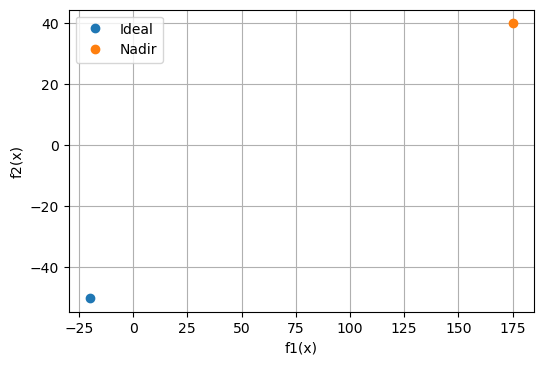

In [4]:
fig, ax = plt.subplots()
fig.set_dpi(100)
ax.plot(f1_min,f2_min,'o',label='Ideal')
ax.plot(f1_max,f2_max,'o',label='Nadir')

ax.set(xlabel='f1(x)', ylabel='f2(x)')
ax.legend()
ax.grid()

#### Añadimos la restricción $\epsilon$-Constraint al problema, generamos los valores de $\epsilon$ y resolvemos


    'pyomo.core.base.var.SimpleVar'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.var.SimpleVar'>). This is usually indicative
    of a modelling error. To avoid this warning, use block.del_component() and
    block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.SimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.SimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
# ==========================================================
# = Solver Results                                         =
# =============================

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -6.5
  Upper bound: -6.5
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 4
  Number of nonzeros: 9
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.03390932083129883
# ----------------------------------------------------------
#   Solution Information
# ---------------------------------------

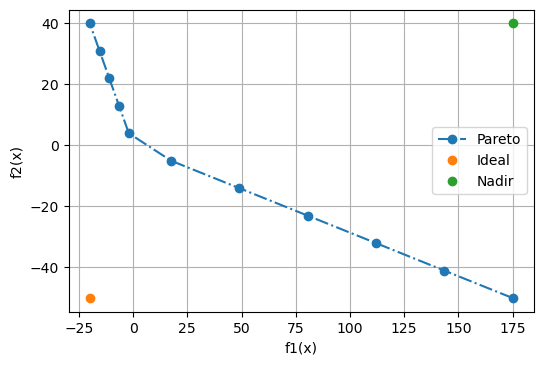

In [6]:

model.O_f1.activate()
model.O_f2.deactivate()


model.f2 = Var()
model.C_f2 = Constraint(expr= model.f2 == 2*model.X1 -  model.X2)

model.e = Param(initialize=0, mutable=True)
model.C_epsilon = Constraint(expr = model.f2 <= model.e)

solver.solve(model)


n = 10
step = int((f2_max - f2_min) / n)
epsilon_val = list(range(int(f2_min),int(f2_max),step)) + [f2_max]

f1_l = []
f2_l = []
for eps in epsilon_val:
    model.e = eps
    res=solver.solve(model)
    f1_l.append(value(model.O_f1))
    f2_l.append(value(model.f2))
fig, ax = plt.subplots()
fig.set_dpi(100)
ax.plot(f1_l,f2_l,'o-.', label='Pareto')
ax.plot(f1_min,f2_min,'o',label='Ideal')
ax.plot(f1_max,f2_max,'o',label='Nadir')

ax.set(xlabel='f1(x)', ylabel='f2(x)')
ax.legend()
ax.grid()
